<a href="https://colab.research.google.com/github/haniJ2000/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Kaggle API
!pip install kaggle

# Create a directory for Kaggle API key and move the key file there
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

# Unzip the dataset
!unzip -o brain-mri-images-for-brain-tumor-detection.zip -d /content/BrainTumorData

# List the contents of the unzipped directory
!ls /content/BrainTumorData


cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 93% 14.0M/15.1M [00:01<00:00, 18.2MB/s]
100% 15.1M/15.1M [00:01<00:00, 11.5MB/s]
Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: /content/BrainTumorData/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/BrainTumorData/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/BrainTumorData/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/BrainTumorData/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/BrainTumorData/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/BrainTumorData/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/BrainTumorData/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/BrainTumorData/brain_tumor_dataset/no/17 no.jpg  
  inflating: /co

In [2]:
!ls /content/BrainTumorData


brain_tumor_dataset  no  yes


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:

# Define the root directory
ROOT_DIR = "/content/BrainTumorData/brain_tumor_dataset"

# Initialize a dictionary to store the number of images for each class
number_of_images = {}

# Iterate over the directories in the root directory
for dir in os.listdir(ROOT_DIR):
    # Exclude the .ipynb_checkpoints directory
    if dir != '.ipynb_checkpoints':
        # Count the number of images in the directory
        number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Print the number of images in each class
print(number_of_images)


{'no': 98, 'yes': 155}


In [5]:
os.listdir("/content/BrainTumorData/brain_tumor_dataset")

['no', 'yes']

we will split the data such that

   70% for train data.
   15% for validation.
   15% for testing.



















    







In [6]:
# Check if the 'train' folder already exists
if not os.path.exists("./train"):
    os.mkdir("./train")

# List all directories in ROOT_DIR
all_dirs = os.listdir(ROOT_DIR)

# Iterate over all directories
for dir in all_dirs:
    if dir == '.ipynb_checkpoints':  # Skip .ipynb_checkpoints directory
        continue

    # Create subdirectory in 'train' folder for each directory in ROOT_DIR
    os.makedirs(os.path.join("./train", dir), exist_ok=True)

    # Get a list of images in the current directory
    images_list = os.listdir(os.path.join(ROOT_DIR, dir))

    # Calculate the number of images to move to 'train' (70% of original)
    num_to_move = math.floor(0.7 * len(images_list)) - 5

    # Select random images to move
    selected_images = np.random.choice(images_list, size=num_to_move, replace=False)

    # Move selected images to the 'train' folder
    for img in selected_images:
        src_path = os.path.join(ROOT_DIR, dir, img)
        dst_path = os.path.join("./train", dir, img)
        os.rename(src_path, dst_path)  # Move or rename the file (in this case, move)

print("Training dataset created successfully.")



Training dataset created successfully.


In [7]:
def dataFolder(p, split):
# Check if the 'train' folder already exists
  if not os.path.exists("./" +p):
    os.mkdir("./" +p)

# List all directories in ROOT_DIR
  all_dirs = os.listdir(ROOT_DIR)

# Iterate over all directories
  for dir in all_dirs:
    if dir == '.ipynb_checkpoints':  # Skip .ipynb_checkpoints directory
        continue

    # Create subdirectory in 'train' folder for each directory in ROOT_DIR
    os.makedirs(os.path.join("./"+p+"/", dir), exist_ok=True)

    # Get a list of images in the current directory
    images_list = os.listdir(os.path.join(ROOT_DIR, dir))

     # Calculate the number of images to move to 'p' (based on split ratio)
    num_to_move = max(1, math.ceil(split * len(images_list)))  # Ensure at least one image is moved

    # Select random images to move
    selected_images = np.random.choice(images_list, size=num_to_move, replace=False)

    # Move selected images to the 'train' folder
    for img in selected_images:
        src_path = os.path.join(ROOT_DIR, dir, img)
        dst_path = os.path.join("./"+p, dir, img)
        shutil.copy(src_path,dst_path)
        os.rename(src_path, dst_path)  # Move or rename the file (in this case, move)

  print("Training dataset created successfully.")

In [8]:
dataFolder("val", split=0.15)

Training dataset created successfully.


In [9]:
dataFolder("test", split=0.15)

Training dataset created successfully.


**Model Build**

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow

In [42]:
# Define the enhanced CNN model
model = Sequential()

# Add convolutional layers with batch normalization and dropout
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation="sigmoid"))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_10 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_11 (Ba  (None, 109, 109, 64)     

In [43]:
from tensorflow import keras
model.compile(optimizer='adam',loss= keras.losses.binary_crossentropy,metrics=['accuracy'])


preparing our data using data generator


In [44]:
def preprocessingImages1(path):
    """
    input : path
    output : preprocessed images
    """

    image_data = ImageDataGenerator(zoom_range =0.2, shear_range=0.2, rescale = 1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode='binary')

    return image


In [45]:
path= "/content/train"
train_data = preprocessingImages1(path)

Found 166 images belonging to 2 classes.


In [46]:
def preprocessingImages2(path):
    """
    input : path
    output : preprocessed images
    """

    image_data = ImageDataGenerator(rescale = 1/255)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode='binary')

    return image

In [47]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 12 images belonging to 2 classes.


In [48]:
path ="/content/val"
val_data = preprocessingImages2(path)

Found 14 images belonging to 2 classes.


In [49]:
#early stopping ad model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor = "val_accuracy", min_delta= 0.01, patience=3, verbose=1, mode='auto')

# model check point
mc = ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1, save_best_only =True,mode="auto")

cd = [es,mc]

Model Traning

In [50]:
hs = model.fit_generator(generator = train_data,
                         steps_per_epoch = len(train_data),
                         epochs=10,
                         verbose =1,
                         validation_data= val_data,
                         validation_steps=len(val_data),
                         callbacks=cd)

<ipython-input-50-826c610f169b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator = train_data,


Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 16.3800 - accuracy: 0.6024


Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to ./bestmodel.h5
6/6 [==============================] - 32s 6s/step - loss: 16.3800 - accuracy: 0.6024 - val_loss: 0.5527 - val_accuracy: 0.5714
Epoch 2/10
6/6 [==============================] - ETA: 0s - loss: 8.0279 - accuracy: 0.6807
Epoch 2: val_accuracy improved from 0.57143 to 0.78571, saving model to ./bestmodel.h5
6/6 [==============================] - 29s 5s/step - loss: 8.0279 - accuracy: 0.6807 - val_loss: 0.5794 - val_accuracy: 0.7857
Epoch 3/10
6/6 [==============================] - ETA: 0s - loss: 3.3412 - accuracy: 0.7530
Epoch 3: val_accuracy did not improve from 0.78571
6/6 [==============================] - 29s 4s/step - loss: 3.3412 - accuracy: 0.7530 - val_loss: 3.9731 - val_accuracy: 0.4286
Epoch 4/10
6/6 [==============================] - ETA: 0s - loss: 3.7582 - accuracy: 0.6867
Epoch 4: val_accuracy did not improve from 0.78571
6/6 [==============================] - 28s 5s/step - loss: 3.7582 - 

In [51]:
# model graphical interpolation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

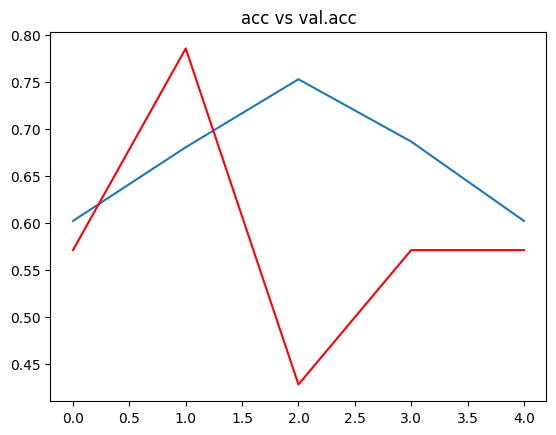

In [52]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = 'red')

plt.title("acc vs val.acc")
plt.show()

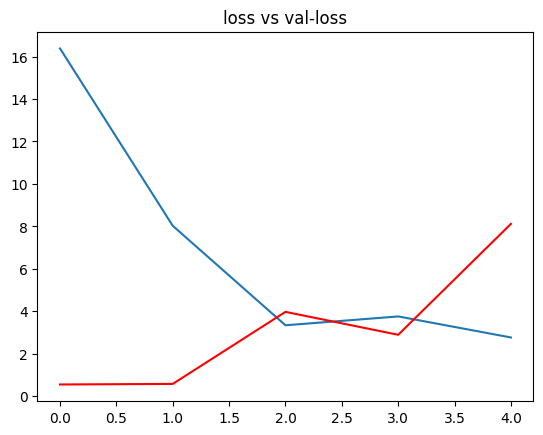

In [53]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'],c = 'red')

plt.title("loss vs val-loss")
plt.show()

In [54]:
#Model accuracy

from keras.models import load_model
model = load_model('/content/bestmodel.h5')

Model Accuracy

In [55]:
acc = model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100} %")

<ipython-input-55-0e34c3604a1c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


the accuracy of our model is 83.33333134651184 %


In [56]:
from keras.preprocessing.image import load_img, img_to_array

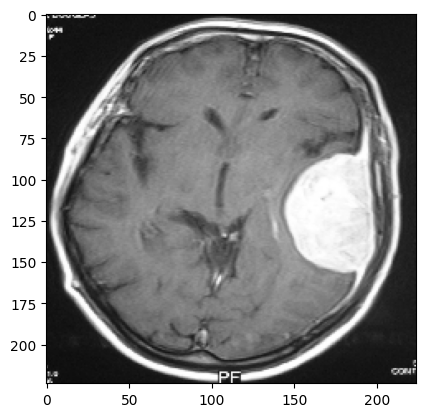

1/1 [==============================] - 0s 58ms/step
the MRI is having a Tumor


In [75]:
path = "/content/BrainTumorData/yes/Y103.jpg"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255.0

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis =0)

pred = model.predict(input_arr)[0][0]

pred_class = 1 if pred > 0.5 else 0

pred_class

if pred_class == 0:
  print("the MRI is not having a Tumor")
else:
  print("the MRI is having a Tumor")

In [64]:
train_data.class_indices

{'no': 0, 'yes': 1}

**END**